In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

# Acquire

In [2]:
df = pd.read_csv('allservicecalls.csv')

In [3]:
df.shape

(495440, 17)

# Prepare

In [4]:
df = wrangle.clean_311(df)
df.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,...,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,zipcode
2497,1014281655,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,...,0,0,0,0,1,0,0,0,0,78251
2498,1014281665,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,...,0,0,0,0,1,0,0,0,0,78251
2499,1014281677,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,...,0,0,0,0,1,0,0,0,0,78251
2556,1014300321,2018-03-06,2020-09-24,2020-05-18,NO,Development Services,buildings,Street Light Existing Res Sub Div,Closed,Constituent Call,...,0,0,1,0,0,0,0,0,0,78211
2657,1014326068,2018-03-14,2018-07-23,2020-05-27,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,...,0,0,1,0,0,0,0,0,0,78073


In [5]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = wrangle.split_separate_scale(df, stratify_by= None)

# Plan Out Explore

## Questions we want to answer

1. Is there a link to which form of reporting is responded to quickest and slowest?
2. Is the average number of calls in an area affect the response time?
3. Does the type of call in an area effect the level of delay? (Loose dog on the south side vs loose dog on the north side)
4. Does the specific location effect the delay time?
5. Does category/department affect response time?
6. Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)
7. late_status and open_days by: zip code, department, source_id (Do different areas get better general service? Do different areas get better service depending on the department/issue?)Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
8. Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
9. Is there a difference in response time between districts?
10. What months or quarters of the year have the higherst volumn of calls? Does this impact how fast they respond?

### Lori's Questions
1. Is there a link to which form of reporting is responded to quickest and slowest?
3. Does the type of call in an area effect the level of delay? (Loose dog on the south side vs loose dog on the north side)

### Gabby's Questions
5. Does category/department affect response time?
6. Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)

### Sam's Questions
7. late_status and open_days by: zip code, department, source_id (Do different areas get better general service? Do different areas get better service depending on the department/issue?)Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
8. Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)

### John's Questions
9. Is there a difference in response time between districts?
10. What months or quarters of the year have the higherst volumn of calls? Does this impact how fast they respond?

### Caitlyn's Questions
2. Is the average number of calls in an area affect the response time?
4. Does the specific location effect the delay time?

___

# Start Exploring

___

## Does the specific location effect the delay time?

### Game plan
- Use the following features in this exploratory analysis
    - zip code
    - council district
    - days_open
    - resolution_days_due
    - days_before_or_after_due
    - level_of_delay (Target)
- Look at the Univariate of each
    - Jot down thoughts, questions, and take aways
- Create bivariate plots seeing how each one plays into one anohter
- Create multivariate  plots

___

## Univariate

#### Zipcode

___

#### Council District

<AxesSubplot:>

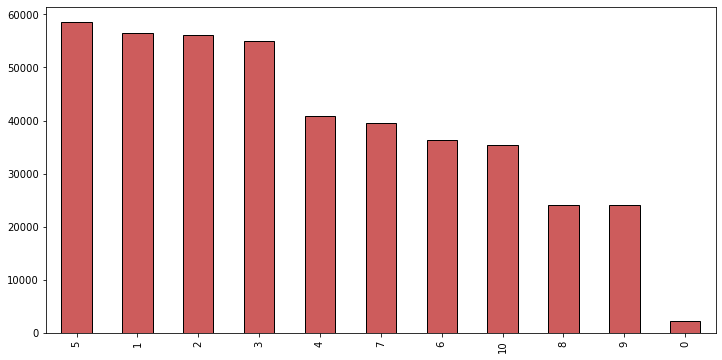

In [6]:
plt.figure(figsize=(12,6))
df['council_district'].value_counts().plot.bar(color='indianred', edgecolor='black')

### Takwaways:
- Districts 1, 2, 3, & 5 have higher reports
- District 0 has nearly no reports in comparison to the others
- 4, 6, 7, 8, 9, & 10 still have many reports but not as much as 1, 2, 3, and 5

<AxesSubplot:xlabel='council_district', ylabel='days_open'>

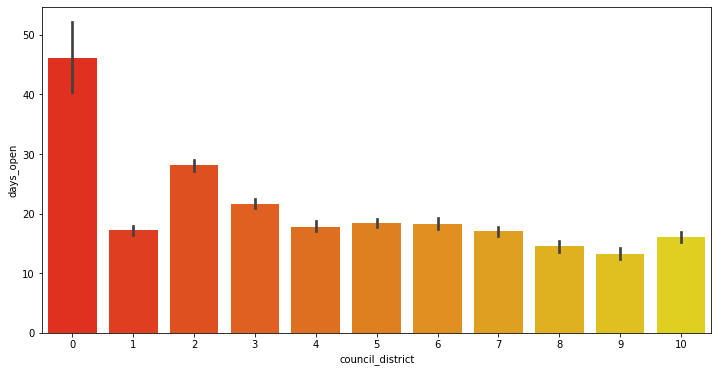

In [7]:
plt.figure(figsize=(12,6))
sns.barplot(data=train, x=train.council_district, y='days_open', palette='autumn')

<AxesSubplot:xlabel='council_district', ylabel='count'>

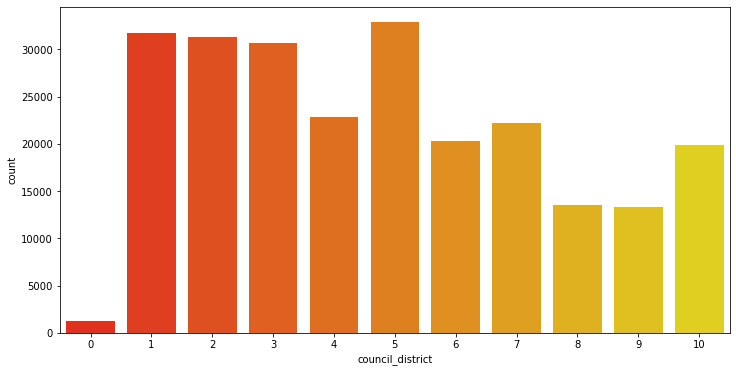

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=train, x=train.council_district, palette='autumn')

## Takeaways:
- District has minimal amount of cases.


___

#### Days Open

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


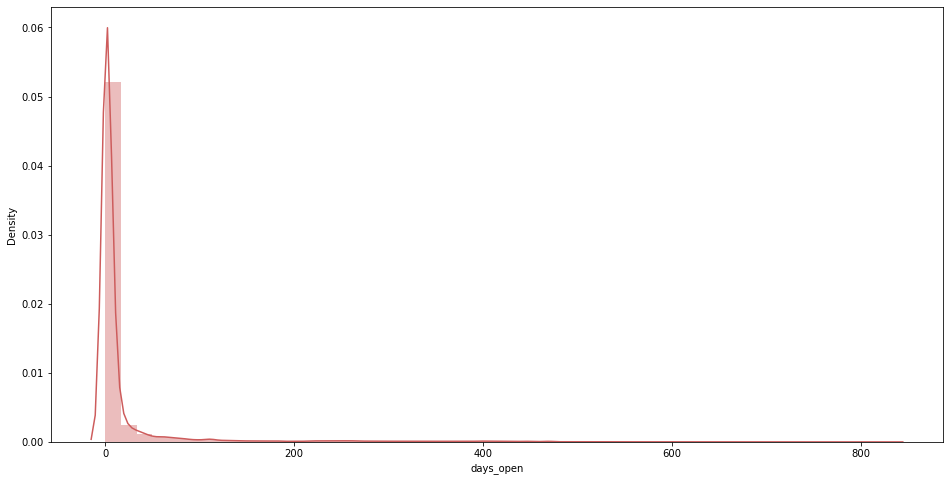

In [9]:
plt.figure(figsize=(16,8))
sns.distplot(df.days_open, color='indianred')
plt.show()

### Takeaways:
- definatly skewed right
- was worse before removing outliers over 1400 days
- not willing to remove any more for the ingrity of the data frame

___

#### Days Until Resolution is Due

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


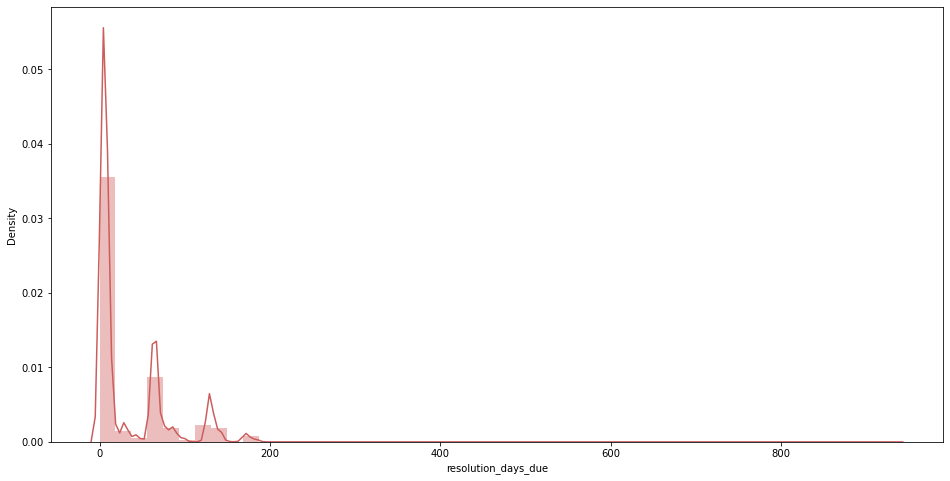

In [10]:
plt.figure(figsize=(16,8))
sns.distplot(df.resolution_days_due, color='indianred')
plt.show()

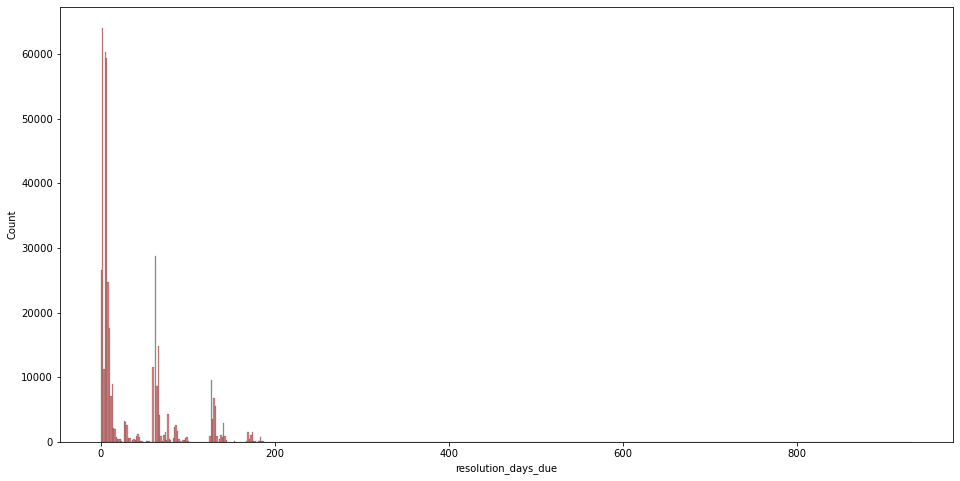

In [11]:
plt.figure(figsize=(16,8))
sns.histplot(df.resolution_days_due, color='indianred')
plt.show()

### Takeaways:
- Skewed right
- Can see a few different spikes but cant see where these are
    - all spikes are between 0 and 200 days open

___

#### Days Before or After Due Date the Resolution was Made

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


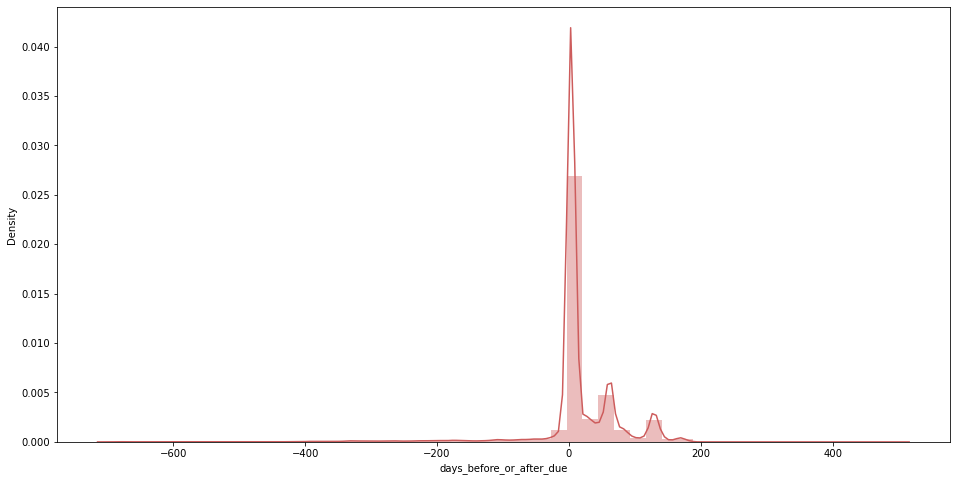

In [12]:
plt.figure(figsize=(16,8))
sns.distplot(df.days_before_or_after_due, color='indianred')
plt.show()

### Takeaways:
- There are more spikes in the casescompleted before due
- The later after the due date the more it trails off

___

## Bivariate

### Council District and Level of Delay

<AxesSubplot:title={'center':'Delay Levels Accross Districts'}, xlabel='level_of_delay', ylabel='count'>

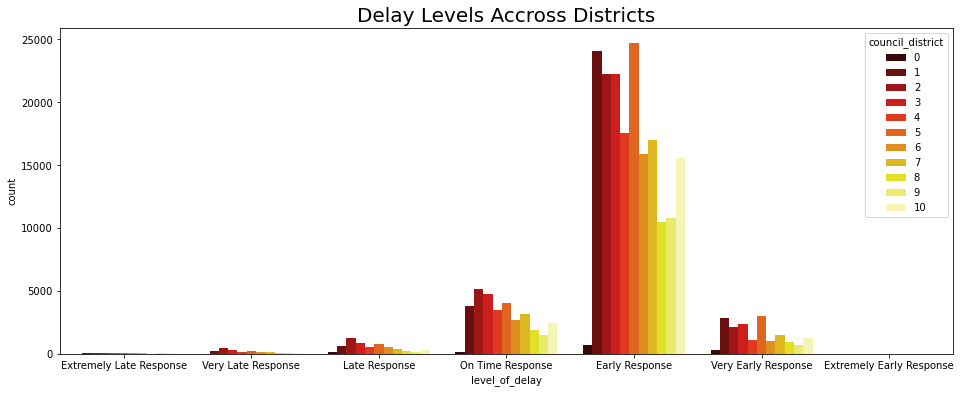

In [13]:
plt.figure(figsize=(16,6))
plt.title("Delay Levels Accross Districts", size=20, color='black')
sns.countplot(x='level_of_delay', hue='council_district', data=train,
               palette='hot')

### Takeaways:
- District 0, 8, and 9 have far less early responses
    - but this is because the have called far less calls compared to all other districts
- it seems that the more we more right and left the lower the numbers get
- Early responses are far more common than any other level of delay

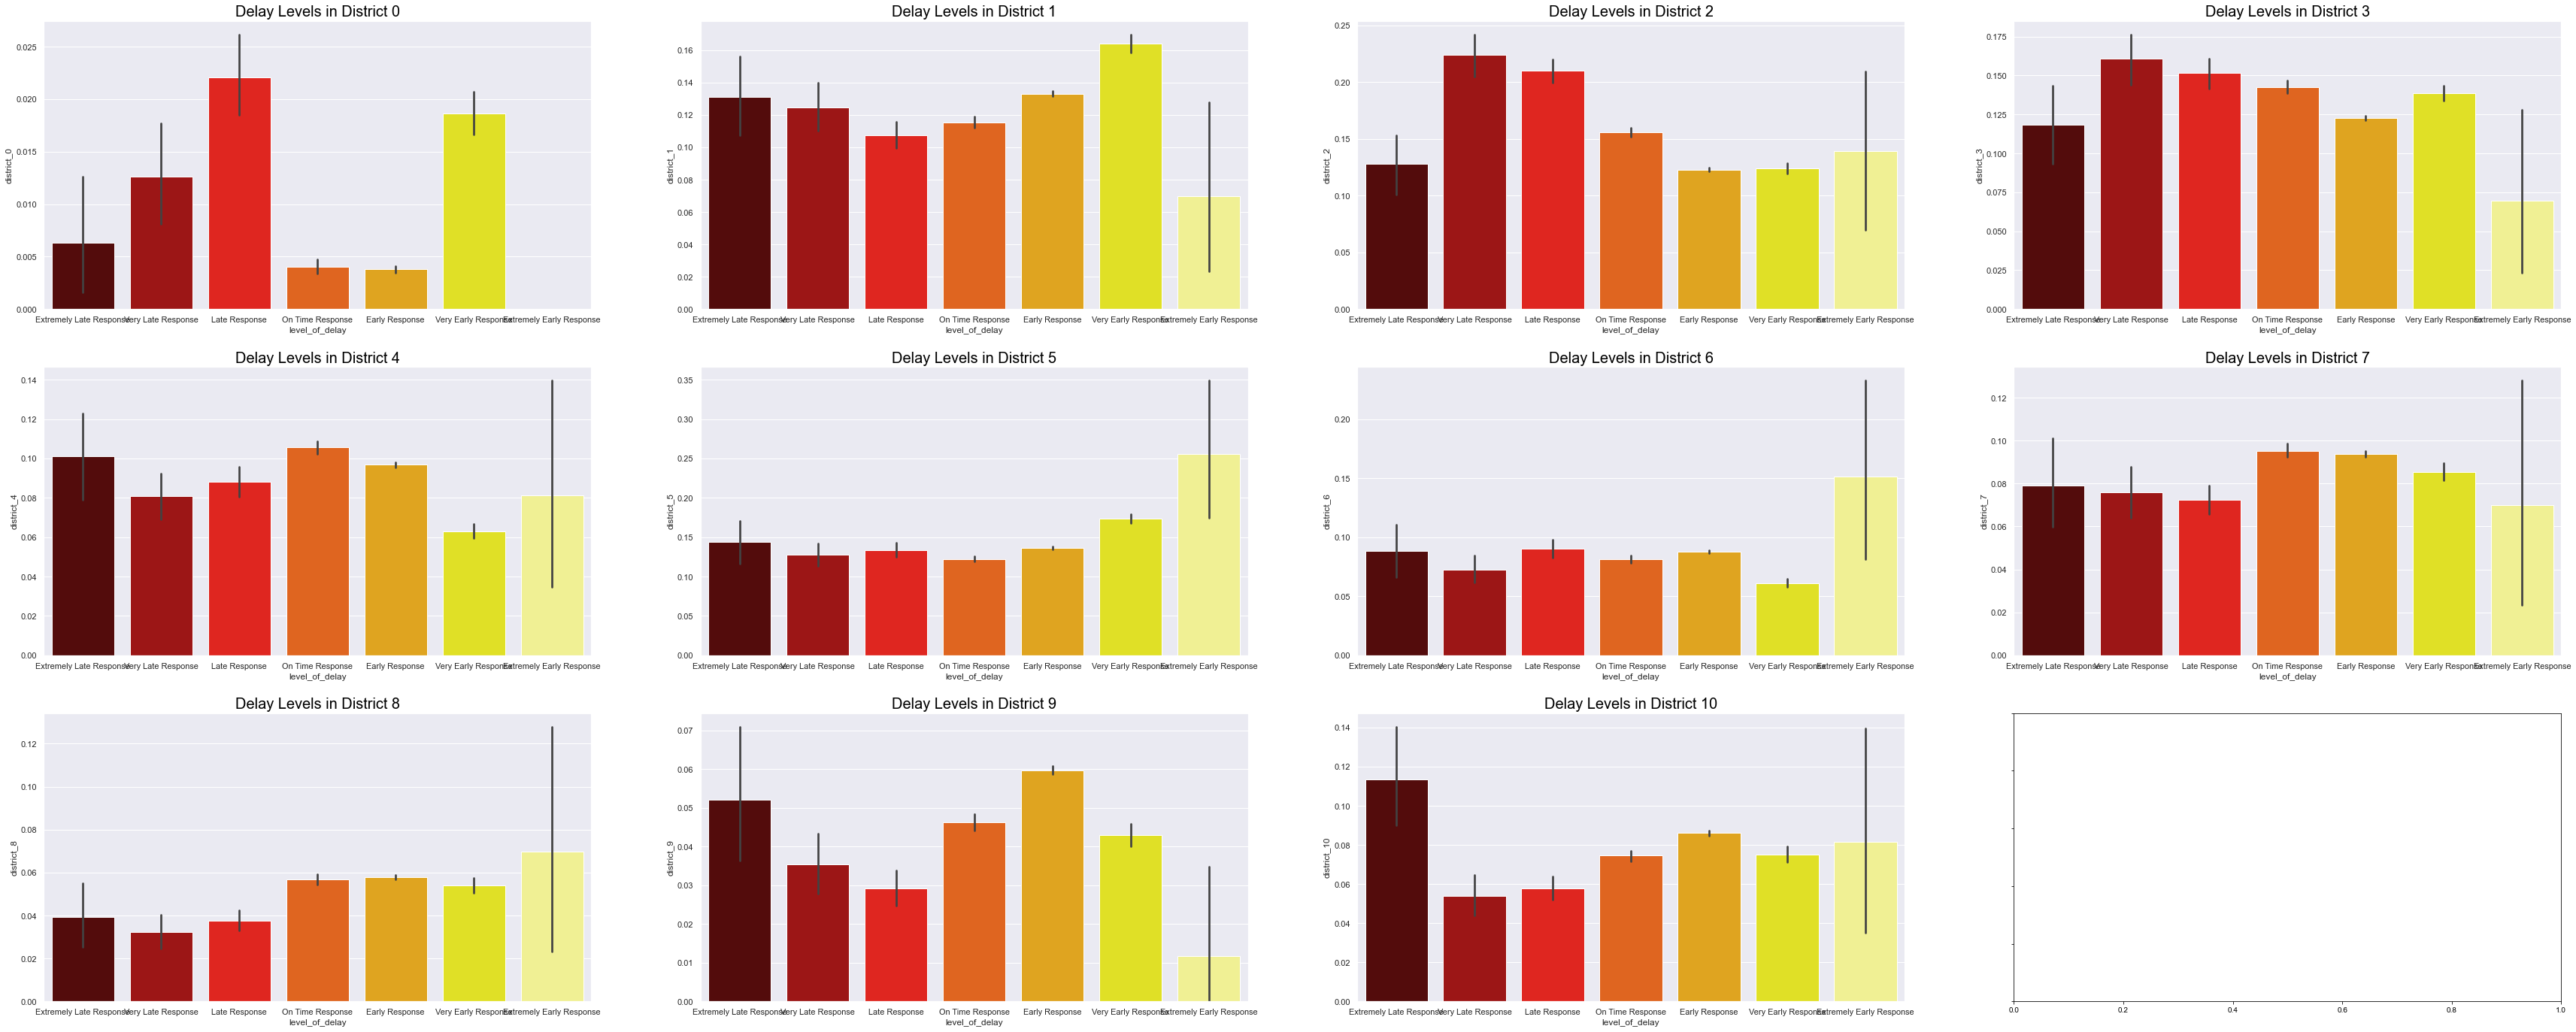

In [14]:
plt.subplots(3, 4, figsize=(60,24), sharey=True)
sns.set(style="darkgrid")


plt.subplot(3,4,1)
plt.title("Delay Levels in District 0", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_0', data=train,
               palette='hot')

plt.subplot(3,4,2)
plt.title("Delay Levels in District 1", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_1', data=train,
               palette='hot')

plt.subplot(3,4,3)
plt.title("Delay Levels in District 2", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_2', data=train,
               palette='hot')

plt.subplot(3,4,4)
plt.title("Delay Levels in District 3", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_3', data=train,
               palette='hot')

plt.subplot(3,4,5)
plt.title("Delay Levels in District 4", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_4', data=train,
               palette='hot')

plt.subplot(3,4,6)
plt.title("Delay Levels in District 5", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_5', data=train,
               palette='hot')

plt.subplot(3,4,7)
plt.title("Delay Levels in District 6", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_6', data=train,
               palette='hot')

plt.subplot(3,4,8)
plt.title("Delay Levels in District 7", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_7', data=train,
               palette='hot')

plt.subplot(3,4,9)
plt.title("Delay Levels in District 8", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_8', data=train,
               palette='hot')

plt.subplot(3,4,10)
plt.title("Delay Levels in District 9", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_9', data=train,
               palette='hot')

plt.subplot(3,4,11)
plt.title("Delay Levels in District 10", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='level_of_delay', y='district_10', data=train,
               palette='hot')

plt.show()

### Takeaways:
- District 0
    - has more late to extremely late reponses than any other response level
    - Does have a largeamound of very early response times, but the late responses still outweight the early
    - Have minimal percent of each delay level
        - highest percentages are that of 
            - very early, making up for only 2% of all very early responses
            - late, making up for only 1.9% of all the late responses in SA
- District 1
    - Mostly early response times
        - Makes up for about 16% of all early responses
    - Makes up for ~ 13.7% of all extremely late responses
    - Made up of:
        - North of downtown
        - north downtown
- District 2
    - makes up for 15% of all Extremely late responses
    - makes up for 22% of all very late responses
    - makes up for 21% of all very late responses
    - has far more late responses than they do early/on time
    - this is the far east side of SA
- District 3
    - this is the south east side of san antonio
    - makes up for 
        - about 16% of all very late resposes
        - 14.7% of all late repsonses
        - 14.3% of on time responses
        - 13% of all very early responses
    - This seems to be fairly even but does still lean towards the later side.
- District 4
    - this is the south west side of san antonio
    - very low percentages accross the board
    - highest is on time responses holding about 10.2% of all on time calls
- District 5
    - Has about 23% of all extremely early responses
    - Hold more early responses than that of late
    - Made up of:
        - West of downtown SA
        - South downtown area
- District 6
    - Hold approximatly 22% of all extrememly early responses
        - appears to be the west side of San anotnio
    - This is the west side of San antonio
- District 7
    - skews slightly towards more early responses
- District 8
    - minimal calls in this district
    - leans more towards early, but extremely late response does spike
    - Castle hills, Anaqua Springs Ranch, dominion, and Bently Manor are located in this district
        - Luxury neighborhoods
- District 9
    - location of hill country villiage
        - Luxury neighborhood
    - minimal calls but has far more extremely late compared to the other levels of response time
    - the decond most common response time is on time responses
- District 10
    - the north west side of SA
    - makes up for about 10% of all extremely late responses

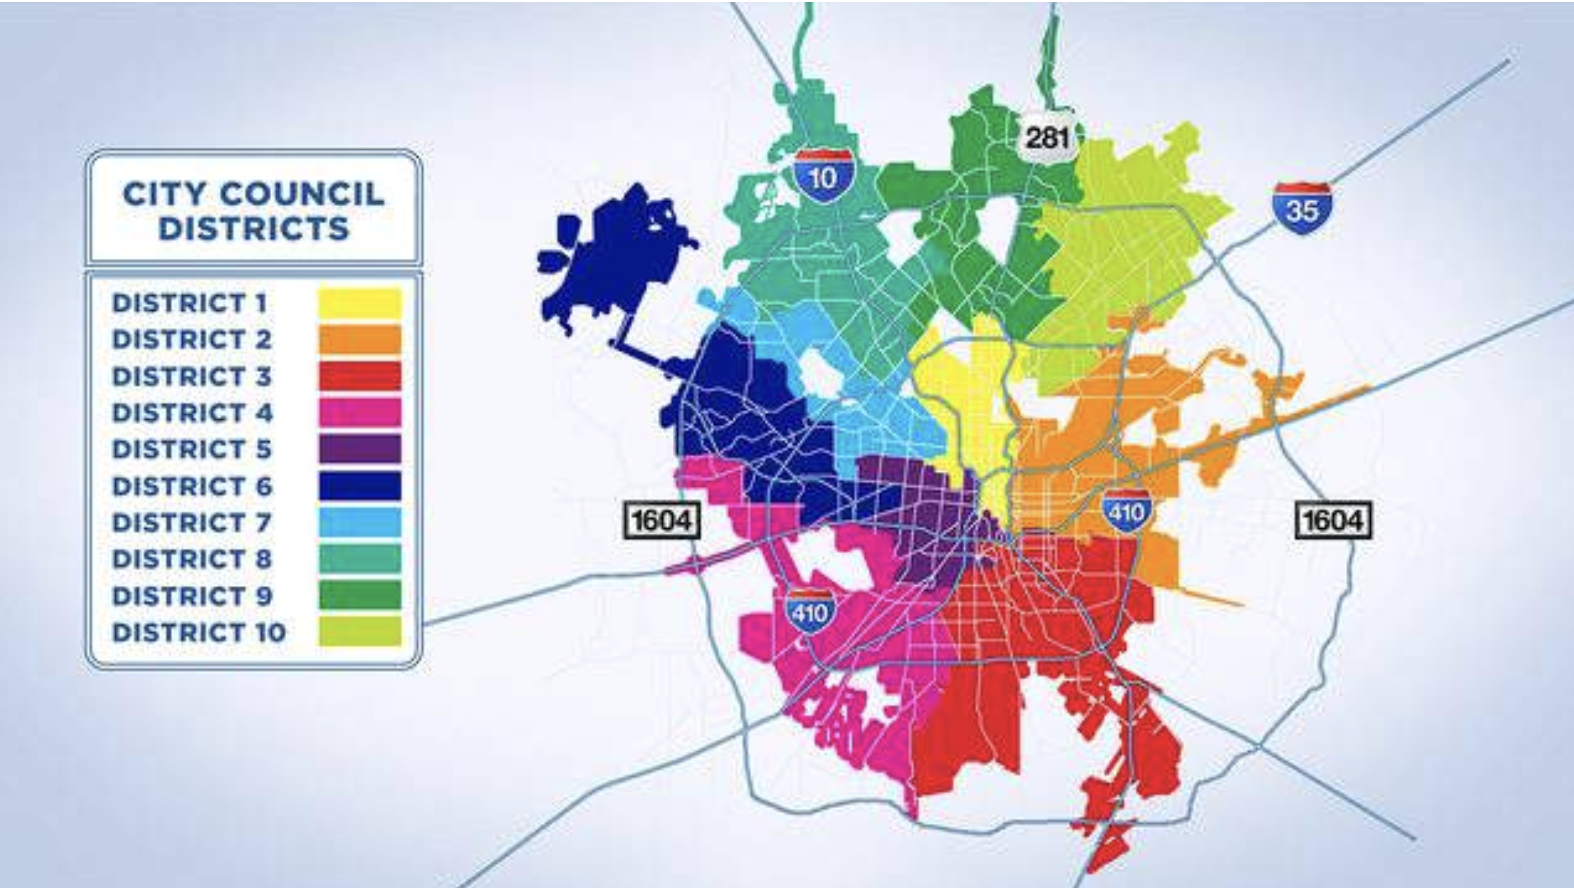

___

## Zip code and level of delays

## Days open and resolution days 

<AxesSubplot:xlabel='days_open', ylabel='resolution_days_due'>

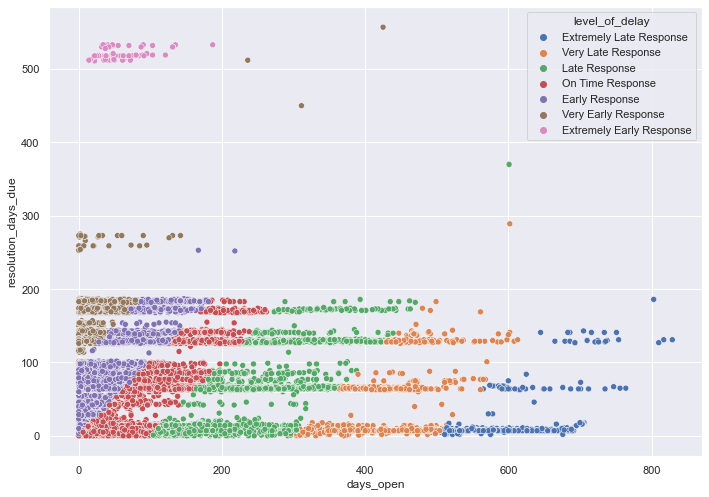

In [15]:
sns.scatterplot(data=train, x='days_open', y='resolution_days_due', hue='level_of_delay')

<AxesSubplot:xlabel='days_open', ylabel='resolution_days_due'>

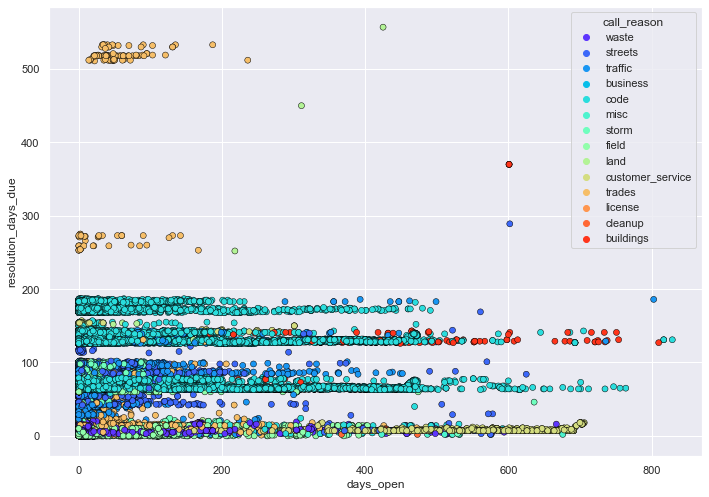

In [16]:
sns.scatterplot(data=train, x='days_open', y='resolution_days_due', palette='rainbow', edgecolor='black',
                hue='call_reason')

## Takeaways:
- most early responses are calls about trades

___

    - zip code
    - council district
    - days_open
    - resolution_days_due
    - days_before_or_after_due
    - level_of_delay

In [17]:
df.zipcode.unique()

array(['78251', '78211', '78073', '78227', '78220', '78201', '78207',
       '78250', '78242', '78223', '78225', '78216', '78213', nan, '78210',
       '78218', '78221', '78203', '78212', '78254', '78249', '78222',
       '78245', '78214', '78228', '78230', '78217', '78204', '78238',
       '78232', '78233', '78209', '78237', '78247', '78240', '78202',
       '78109', '78231', '78244', '78259', '78260', '78224', '78258',
       '78226', '78239', '78248', '78215', '78023', '78205', '78219',
       '78112', '78208', '78229', '78252', '78255', '78256', '78266',
       '78257', '78264', '78284', '78148', '78253', '78235', '78150',
       '78236', '78108', '78263', '78261', '78052', '78152', '78006',
       '78234', '78015', '78002', '78101', '78154', '78163', '78288',
       '78124'], dtype=object)